In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import utils

In [2]:
train_data = np.loadtxt(open("data/train_data.csv", "rb"), delimiter=",")
train_labels = np.loadtxt(open("data/train_labels.csv", "rb"), delimiter=",")
test_data = np.loadtxt(open("data/test_data.csv", "rb"), delimiter=",")

In [3]:
scaler = StandardScaler()
train_data_stand = scaler.fit_transform(train_data)
test_data_stand = scaler.fit_transform(test_data)

In [4]:
LogReg = LogisticRegression(multi_class='ovr', penalty='l1',tol=0.1)

In [5]:
LogReg.fit(train_data_stand, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)

In [6]:
LogReg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)

In [7]:
LogReg.score(train_data_stand,train_labels)

0.74696309878523948

In [44]:
from sklearn.metrics import f1_score

In [10]:
kk = LogReg.predict(train_data_stand)

In [49]:
f1_score(train_labels, kk, average='weighted')

0.72733432146115362

In [45]:
pred = LogReg.predict(test_data_stand)
pred_log = LogReg.predict_log_proba(test_data_stand)

In [14]:
utils.make_submission(pred, 'LogReg')

In [8]:
from sklearn.metrics import confusion_matrix

In [13]:
conf = confusion_matrix(train_labels, kk)

Confusion matrix, without normalization
[[1996   90   17   14   12   29    4   10    5    1]
 [ 152  432   13   10    1    6    1    0    2    1]
 [  34   14  265    3    3    4    1    0    2    0]
 [  56   16    3  162    3   11    1    1    0    0]
 [ 106    8    5    8   71    3    5    4    2    2]
 [  82    8   18   10    5  133    1    1    1    1]
 [  76   11    5    7    6    3   27    4    2    0]
 [ 102    1    1    3    1    1    0   86    0    0]
 [   8    6    9    0    1    3    0    0   65    0]
 [  51    1    0    6    2    0    1    3    0   22]]


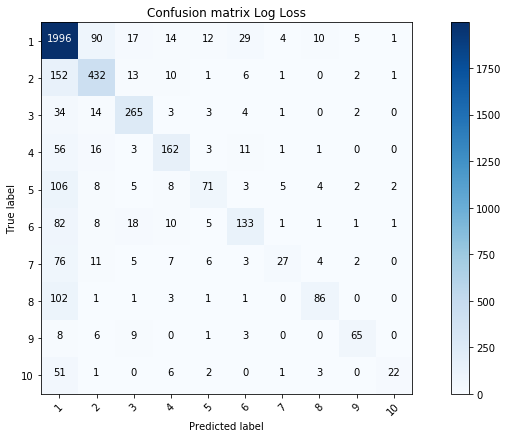

In [32]:
utils.plot_confusion_matrix(conf, title='Confusion matrix Log Loss')